# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 01.10.2023

Мягкий дедлайн: 23:59MSK 15.10.2023

Жесткий дедлайн: 23:59MSK 20.10.2023

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Итогова оценка считается как
$$
min(task_1, task_2)*0.8 + max(task_1, task_2)*0.2
$$

где task_1 и task_2 - оценки за первое и второе заданиее соответсвенно.
Также, за домашнее задание выставляется 0, если не сделано нулевое или третье задание.
### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import random
device = "cuda" if torch.cuda.is_available() else "cpu"
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install wandb --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2023-10-20 12:59:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [     <=>            ] 201.24M  32.5MB/s    in 5.9s    

2023-10-20 12:59:41 (34.1 MB/s) - ‘data.txt.zip’ saved [211011981]



In [ ]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Мы вывели кусок данных, чтобы понять, насколько они пригодны для работы без изменений. Здесь ясно, что сомнительно дальше с такими данными работать, потому что как минимум есть отрицательные значения, которые не отмасштабированы, кроме того еще сразу бросается в глаза совсем разная размерность, где-то видим реально большие числа, а где-то 0.075. Ясно, что будем скейлить.

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

Для выполнения данного задания (и всех последующих) предобработайте данные.

1. Зафиксируйте random_seed везде где только возможно. Вам предоставлена функция для этого, однако вы можете дополнить ее своими дополнениями
2. Обучите StandertScaler и предобработайте ваши данные. В следующих заданиях можете использовать другой scaler или вообще отказаться от него


In [ ]:
from sklearn.preprocessing import StandardScaler

# Масштабируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [ ]:
set_random_seed(42)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# подберем значение альфа для риджа
parameters = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

model = Ridge()
ridge_gs= GridSearchCV(model,
                       parameters,
                       scoring='neg_root_mean_squared_error',
                       cv=5)

ridge_gs.fit(X_train, y_train)

# модель с лучшими параметрами
model = ridge_gs.best_estimator_

In [ ]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print('RMSE нормальной модели:', rmse)

RMSE нормальной модели: 9.510172609963115


Лучшая константа для RMSE это среднее, посчитаем значение метрики при нем

In [ ]:
constant_vec = np.full(y_test.shape, np.mean(y_train))
best_rmse_metric = np.sqrt(mean_squared_error(y_test, constant_vec))
print('RMSE модели, предсказывающей константное (среднее) значение:', best_rmse_metric)

RMSE модели, предсказывающей константное (среднее) значение: 10.85246390513634


## Задание 1. (максимум 10 баллов)

Закрепите свои знания о том, как pytorch работает с обратным распространением ошибки, проделав следующие шаги:

1. Создайте модель линейной регрессии, которая будет состоять только из одного Linear слоя.
2. Напишите цикл обучения вашей линейной регрессии. В нем реализуйте подсчет функции потерь, сделайте шаг градиентного спуска. Запрещено использовать готовые оптимизаторы и loss-функции из библиотеки pytorch. Для подсчета градиента воспользуйтесь методом backward.
3. Запустите обучение на 10 эпохах, после каждой проверяйте значение целевой метрики на тестовой выборке.
4. Выведите на экран графики метрики и значения функции потерь на тестовой и обучающей выборке.

В данном задании нет цели побить какой-то порог по метрике. Ваша задача - убедиться в том, что ваш рукописный цикл обучения работает. Для ускорения вычислений и обучения модели можете брать только срез данных, а не весь датасет.

In [3]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses):
    clear_output()
    fig, axs = plt.subplots(1, 1, figsize=(13, 4))
    axs.plot(range(len(train_losses)), train_losses, label='train')
    axs.plot(range(len(test_losses)), test_losses, label='test')
    axs.set_ylabel('loss')
    axs.set_xlabel('epoch')
    axs.legend()

    plt.show()

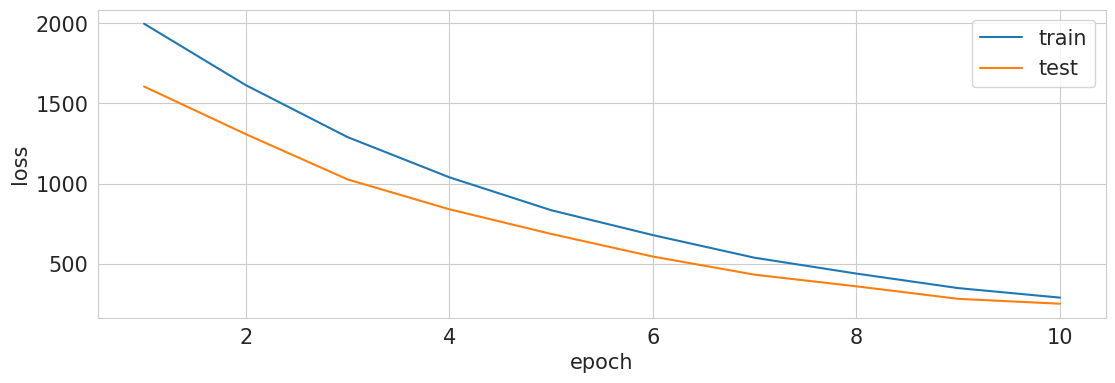

In [ ]:
in_size = X_train.shape[1]
out_size = 1
model = nn.Sequential(nn.Linear(in_size, out_size))

batch_size = 1024
num_epochs = 10
lr = 0.1

train_losses, test_losses = [], []

for epoch in range(num_epochs):
# Берем случайные индексы, чтобы создать батч
  batch_indices = random.sample(range(X_train.shape[0]), batch_size)
  X_batch = torch.from_numpy(X_train[batch_indices].astype(np.float32))
  y_batch = torch.from_numpy(y_train[batch_indices].astype(np.float32))

  y_pred = model(X_batch)
# Считаем лосс (MSE) и обучаемся на нем
  train_mse = torch.mean((y_pred - y_batch)**2)
  train_mse.backward()
# Запрещаем считать градиенты из-за inplace операции
  with torch.no_grad():  # https://discuss.pytorch.org/t/leaf-variable-was-used-in-an-inplace-operation/308/2
    for parameter in model.parameters():
    # Делаем шаг градиентного спуска
      parameter.data -= lr * parameter.grad
    # Зануляем градиент каждого параметра
      parameter.grad.zero_()

# Считаем значение RMSE за эпоху и сохраняем его в историю
  train_rmse = torch.sqrt(train_mse).item()
  train_losses.append(train_rmse)

# Запрещаем считать градиенты на валидации
  with torch.no_grad():
# Берем случайные индексы, чтобы создать батч
    batch_indices = random.sample(range(X_test.shape[0]), batch_size)
    X_batch = torch.from_numpy(X_test[batch_indices].astype(np.float32))
    y_batch = torch.from_numpy(y_test[batch_indices].astype(np.float32))

    y_pred = model(X_batch)

# Сразу считаем RMSE и сохраняем его в историю
  test_rmse = torch.sqrt(torch.mean((y_pred - y_batch)**2)).item()
  test_losses.append(test_rmse)

  print(f'Epoch: {epoch}, train loss: {train_rmse}, test loss: {test_rmse}')

plot_losses(train_losses, test_losses)

## Задание 2. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из предыдущего задания.



Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться сигнатурами функций, которые приведены ниже. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

# Предобработка данных

Проверим, есть ли пропущенные значения в датасете - их нет.

In [ ]:
df.isna().sum().any()

False

Посмотрим, есть ли скоррелированные признаки. У некоторых пар коэффициент корреляции высокий, поэтому уберем некоторые из признаков.

In [ ]:
df.corr().unstack().sort_values(key=abs, ascending=False).drop_duplicates()[:10]

0   0     1.000000
22  20    0.865684
23  18    0.859569
    16    0.846649
18  16    0.809554
16  20    0.727053
18  22    0.717048
23  22    0.716784
    20    0.713113
22  16    0.698199
dtype: float64

Признаки 18 и 22 меньше скоррелированы с целевой переменной, чем 16 и 20, поэтому уберем их.



In [ ]:
features_to_check = [16, 18, 20, 22]
for feature in features_to_check:
  print(f'Признак {feature}, коэффициент корреляции: {df[0].corr(df[feature])}')

Признак 16, коэффициент корреляции: 0.03282861163324635
Признак 18, коэффициент корреляции: 0.021965066162753278
Признак 20, коэффициент корреляции: 0.08705678129023879
Признак 22, коэффициент корреляции: 0.049735529782062866


In [ ]:
df_new = df.drop(columns=[18, 22])

Проверим, есть ли в датасете околоконстантные признаки, у которых разброс близок к 0 - здесь убирать, кажется, нечего.

In [ ]:
df.var().sort_values(key=abs, ascending=True)[:10]

11     19.104313
1      36.815264
10     42.643926
8      63.422548
12     69.225562
9     111.996937
0     119.487774
6     165.321773
88    178.130575
7     212.339488
dtype: float64

# Реализация

In [ ]:
X = df_new.iloc[:, 1:].values
y = df_new.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# Масштабируем признаки

X_scaler = StandardScaler()
# X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
# y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_scaler.fit_transform(y_test.reshape(-1, 1))

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Создаем тренировочный и тестовый датасеты
train_set = TensorDataset(torch.from_numpy(X_train.astype(np.float32)), torch.from_numpy(y_train.astype(np.float32)))
test_set = TensorDataset(torch.from_numpy(X_test.astype(np.float32)), torch.from_numpy(y_test.astype(np.float32)))

# Загружаем тренировочные и тестовые данные в дата лоадер
# https://discuss.pytorch.org/t/what-is-the-most-standard-way-to-put-data-in-batch/84769

train_loader = DataLoader(train_set, shuffle=True, batch_size=64)
test_loader = DataLoader(test_set, shuffle=True, batch_size=1024)

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features, hide_neurons, out_size):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(in_features, hide_neurons),
            # nn.BatchNorm1d(hide_neurons),
            nn.ReLU(),
            nn.Linear(hide_neurons, hide_neurons // 2),
            # nn.BatchNorm1d(hide_neurons // 2),
            nn.ReLU(),
            # nn.Dropout(0.2),
            nn.Linear(hide_neurons // 2, out_size)
            )

    def forward(self, X):
        return self.model(X)

In [ ]:
def train(model, optimizer, criterion, scheduler, train_loader, test_loader, num_epochs, wandb_project=None):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
        num_epochs - number of epochs
        wandb_project - if stated, creates a wandb project to watch training
    '''
    if wandb_project:
        import wandb
        wandb.init(project=wandb_project)
        wandb.watch(model)

  # Сюда будем складывать значения RMSE за каждую эпоху
    train_losses, test_losses = [], []

    for epoch in range(num_epochs):
  # В эту переменную будем складывать значение лосса, чтобы потом в ней посчитать RMSE и добавить его в историю
      train_loss = 0.0

      model.train()
      for X_train, y_train in tqdm(train_loader, desc=f'Training, epoch {epoch} '):
        y_pred = model(X_train)
      # Считаем лосс (MSE) и обучаемся на нем
        train_mse = criterion(y_pred, y_train)
        train_mse.backward()
      # Делаем градиентный шаг
        optimizer.step()
      # Зануляем все градиенты
        optimizer.zero_grad()


      # Возвращаем данные к предыдущему масштабу
        unscaled_y_pred, unscaled_y_train = y_scaler.inverse_transform(y_pred.detach().numpy()), y_scaler.inverse_transform(y_train)
      # Считаем MSE на расскейленных данных
        train_mse = criterion(torch.tensor(unscaled_y_pred), torch.tensor(unscaled_y_train)).item()
      # Добавляем в переменную MSE, умноженное на размер батча
        train_loss += train_mse * X_train.shape[0]

      if scheduler is not None:
        scheduler.step()

   # Усредняем MSE для всего трейна
      train_loss /= len(train_loader.dataset)
    # Добавляем в историю значение RMSE, взяв корень из усредненного MSE
      train_losses.append(np.sqrt(train_loss))


    # В эту переменную будем складывать значение лосса, чтобы потом в ней посчитать RMSE и добавить его в историю
      test_loss = 0.0
      model.eval()
      for X_test, y_test in tqdm(test_loader, desc=f'Validating, epoch {epoch} '):
      # Запрещаем считать градиенты на валидации
        with torch.no_grad():
          y_pred = model(X_test)
          unscaled_y_pred, unscaled_y_test = y_scaler.inverse_transform(y_pred.detach().numpy()), y_scaler.inverse_transform(y_test)
          test_mse = criterion(torch.tensor(unscaled_y_pred), torch.tensor(unscaled_y_test)).item()
      # Добавляем MSE, умноженное на размер батча
        test_loss += test_mse * X_test.shape[0]

      test_loss /= len(test_loader.dataset)
    # Добавляем в историю значение RMSE, взяв корень из усредненного MSE
      test_losses.append(np.sqrt(test_loss))

      if epoch % 2 != 0:
        plot_losses(train_losses, test_losses)

      print(f'Epoch: {epoch}, train_loss: {train_losses[-1]}')
      print(f'Epoch: {epoch}, test_loss: {test_losses[-1]}')


def test(model, criterion, test_loader):
    """
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """
  # Сюда будем складывать таргеты по мере их предсказания
    predicts = torch.tensor(())
  # Сюда будем складывать значения RMSE за каждую эпоху
    test_losses = []

# В эту переменную будем складывать значения лосса, чтобы потом посчитать RMSE и добавить в историю
    test_loss = 0.0
    model.eval()
    for X_test, y_test in tqdm(test_loader):
      with torch.no_grad():
        y_pred = model(X_test)
      # Добавляем новые полученные предсказания
        predicts = torch.cat((predicts, y_pred), 0)
      # Считаем лосс на данных, которые вернули к прежнему масштабу
        unscaled_y_pred, unscaled_y_test = y_scaler.inverse_transform(y_pred.detach().numpy()), y_scaler.inverse_transform(y_test)
        test_mse = criterion(torch.tensor(unscaled_y_pred), torch.tensor(unscaled_y_test)).item()

    # Добавляем MSE, умноженное на размер батча
      test_loss += test_mse * X_test.shape[0]
  # Усредняем MSE для всего теста
    test_loss /= len(test_loader.dataset)
  # Добавляем в историю значение RMSE, взяв корень из усредненного MSE
    test_losses.append(np.sqrt(test_loss))

    print(f'RMSE: {np.mean(test_losses)}')

    return predicts


In [ ]:
#b5ee14ffb7fbbcfae87b62e6b507cbc208dc95cf

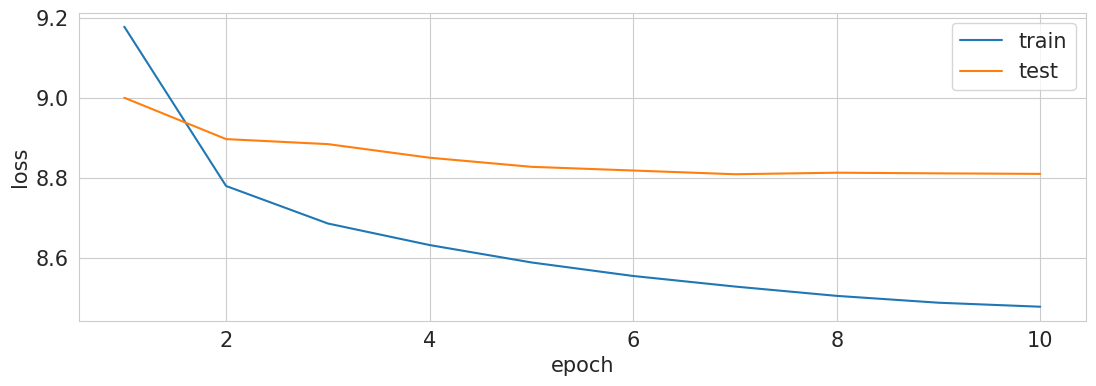

Epoch: 9, train_loss: 8.477754618710927
Epoch: 9, test_loss: 8.809752656767474


In [ ]:
IN_SIZE = X_train.shape[1]
HIDE_NEURONS = 64
OUT_SIZE = 1
NUM_EPOCH = 10
LR = 0.01

model = Model(IN_SIZE, HIDE_NEURONS, OUT_SIZE)
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
criterion = F.mse_loss
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)

train(model, optimizer, criterion, scheduler, train_loader, test_loader, NUM_EPOCH, 'model1')

In [ ]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

  0%|          | 0/51 [00:00<?, ?it/s]

RMSE: 8.8097526597604


Изначально модель была с LR = 0.01, тренировочный batch_size = 64, тестовый - 1024, SGD оптимайзер. RMSE на тесте - 8.80.

## Задание 3. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

# Поэкспериментируем с батчем

При уменьшении размера тестового батча до 128 и 512 кач-во модели не улучшилось, только замедлилось время обучения.

При увеличении до 2048 RMSE остался примерно таким же (8.82), до 4096 - стал выше, т.е. кач-во ухудшилось.

Оставим тестовый batch_size = 1024 и попробуем BatchNorm.

Batchnorm ситуации не улучшил, RMSE был 8.83, поэтому пока обойдемся без него.

# Со скоростью обучения

При увеличении LR до 0.1 значение RMSE на трейне стремительно уменьшалось, на трейне же оставалось высоким - около 8.8.

При уменьшении до 0.001 значения RMSE стабильно, но медленно снижались и на трейне, и на тесте, потому все равно оставались высокими - 8.9 и 9 соответственно.

Оставляем LR = 0.01.



# С масштабированием данных

Если нормализовать данные с помощью MinMaxScaler, а не стандартизировать с помощью StandardScaler, кач-во модели заметно ухудшается - RMSE на тесте падает с 10.7 до 9.9, поэтому оставим StandardScaler.

# С методом оптимизации

Сначала я пыталась покрутить параметры SGD, увеличивая и уменьшая weight_decay и momentum, но это не улучшало качество модели, делало обучение нестабильным (и трейн, и тест начинали прыгать). Только при weight_decay = 0.01 и momentum = 0.05 результаты получились стабильные по сравнению с изначальной моделью, кач-во тем не менее только упало.


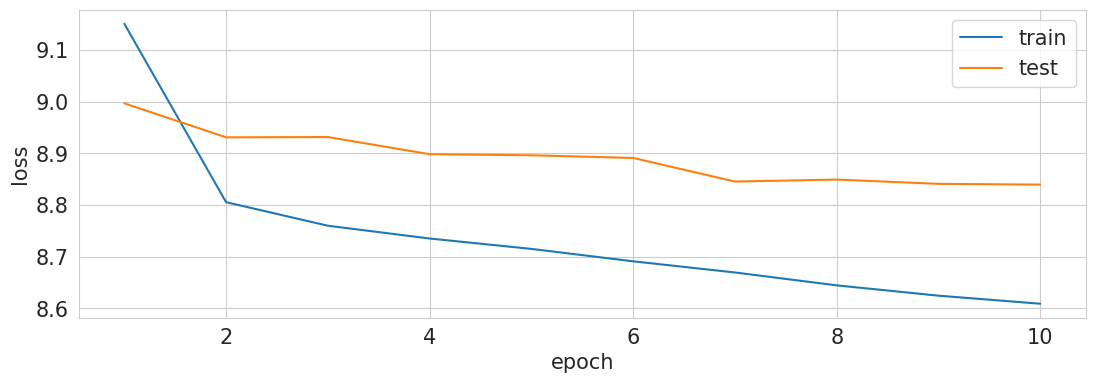

Epoch: 9, train_loss: 8.608854856231332
Epoch: 9, test_loss: 8.839555158712992


In [ ]:
IN_SIZE = X_train.shape[1]
HIDE_NEURONS = 64
OUT_SIZE = 1
NUM_EPOCH = 10
LR = 0.01

model = Model(IN_SIZE, HIDE_NEURONS, OUT_SIZE)
optimizer = torch.optim.SGD(model.parameters(), lr=LR, weight_decay=0.01, momentum=0.05)
criterion = F.mse_loss
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)

train(model, optimizer, criterion, scheduler, train_loader, test_loader, NUM_EPOCH, 'model1')

Попробуем оптимизатор Adam.


Оставив параметры SGD, при LR = 0.01, weight_decay = 0.01 получили RMSE = 8.84.

При LR = 0.0001, weight_decay = 0.0001 уменьшение ошибки на тесте стало стабильным, прям как на трейне, но RMSE поднялся до 8.85.

При LR = 0.001, weight_decay = 0.0001 удалось добиться RMSE = 8.80.

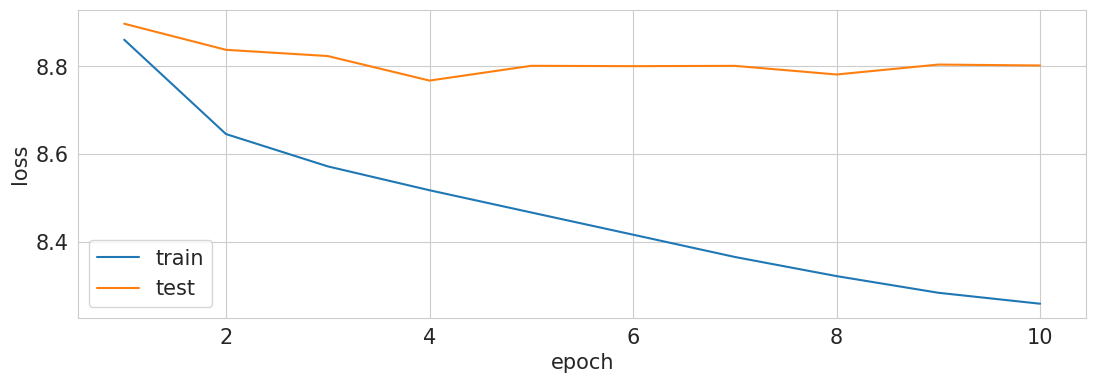

Epoch: 9, train_loss: 8.259332689458223
Epoch: 9, test_loss: 8.801843269078653


In [ ]:
IN_SIZE = X_train.shape[1]
HIDE_NEURONS = 64
OUT_SIZE = 1
NUM_EPOCH = 10
LR = 0.001

model = Model(IN_SIZE, HIDE_NEURONS, OUT_SIZE)
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=0.0001)
criterion = F.mse_loss
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)

train(model, optimizer, criterion, scheduler, train_loader, test_loader, NUM_EPOCH, 'model1')

Попробовала использовать AdamW с такими же параметрами - RMSE поднялся до 8.84.

При увеличении weight_decay до 0.001 RMSE упал до 8.80. Продолжила увеличивать значение параметров: при weight decay 0.1 кач-во улучшилось, RMSE стал 8.77.

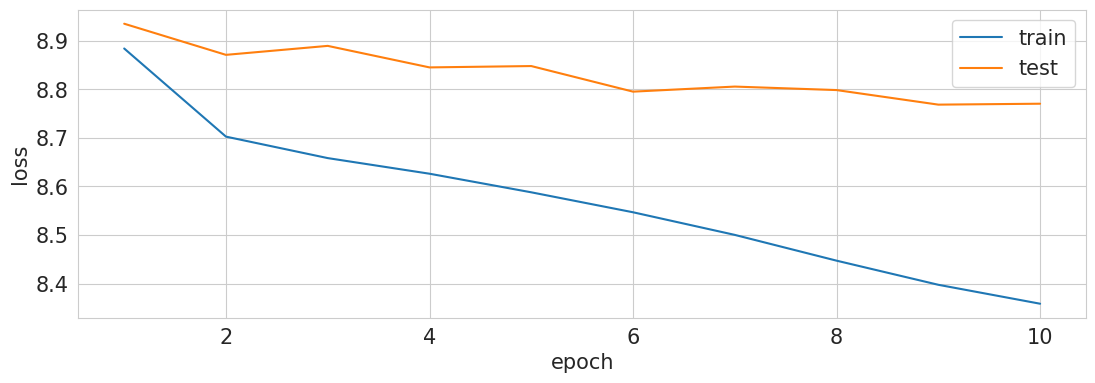

Epoch: 9, train_loss: 8.358760803106867
Epoch: 9, test_loss: 8.770204921961009


In [ ]:
IN_SIZE = X_train.shape[1]
HIDE_NEURONS = 64
OUT_SIZE = 1
NUM_EPOCH = 10
LR = 0.001

model = Model(IN_SIZE, HIDE_NEURONS, OUT_SIZE)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=0.1)
criterion = F.mse_loss
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)

train(model, optimizer, criterion, scheduler, train_loader, test_loader, NUM_EPOCH, 'model1')

# Эксперименты со всем подряд

При дальнейшем изменении параметров LR и WD RMSE никак не опускался ниже 8.77. Решила попробовать вернуть батчнорм, но он тоже не уменьшил ошибку, поэтому снова убрала его.

Т.к. ни изменение weight_decay, ни изменение LR, ни возвращение батчнорма, ни добавление дропаута особо не меняли качество модели, я попробовала поменять кол-во нейронов в скрытом слое. На семинаре упоминалось, что пирамидчатые модели, в которых кол-во параметров идет на убывание, работают получше обычных, поэтому изначально на выходе скрытого слоя и на входе последнего кол-во нейронов было поделено на 2. Я убрала уменьшение кол-ва нейронов - кач-во упало, RMSE стал 8.84, поэтому вернулась к изначальному размеру слоев.

Потом поняла, что вообще-то можно увеличивать кол-во эпох, вернулась к лучшим параметрам, найденным для AdamW до этого (LR = 0.01, weight_decay = 0.1) - так удалось снизить RMSE сначала до 8.76, а потом, совсем немного изменив параметры, и удалось получить RMSE = 8.74, ура!

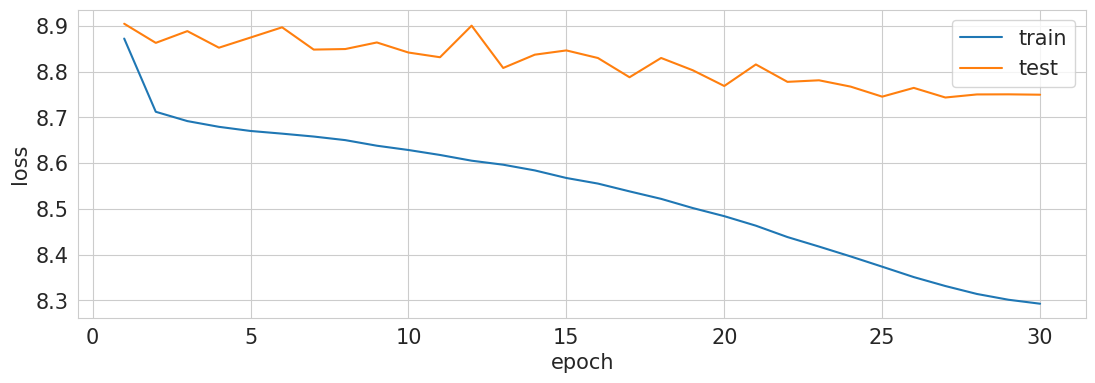

Epoch: 29, train_loss: 8.292744839223284
Epoch: 29, test_loss: 8.749684407361295


In [ ]:
IN_SIZE = X_train.shape[1]
HIDE_NEURONS = 64
OUT_SIZE = 1
NUM_EPOCH = 30
LR = 0.0011

model = Model(IN_SIZE, HIDE_NEURONS, OUT_SIZE)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=0.11)
criterion = F.mse_loss
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)

train(model, optimizer, criterion, scheduler, train_loader, test_loader, NUM_EPOCH, 'model1')

При написании кода источниками стали ноутбучки к семинарам 1, 2, 3 - как общие, так и нашей (десятой) группы (их вроде нет на гите, я из тг чата брала), где-то в коде также лежат ссылки на сайты, которые послужили источником пары строк.